In [1]:
# imports
import numpy as np
import sys
sys.path.append('../')
from landscape_models import make_NK, make_RMF
import matplotlib.pyplot as plt
import utils
import pandas as pd
from ruggedness import NMaximaEstimator
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [5]:
make_RMF?

# Normalising for sequence length $N$

Below we normalise $N_{max}$ for sequence length for RMF landscapes.  

In [14]:
def run_RMF_replicates(cval, n_values=[5,6,7,8,9] ,alphabet='AGC', reps=10, dist=np.random.uniform): 
    """Function to create replicate RMF landscapes, calculate Nmax statistics, and return
    the results."""
    
    ALPHABET = alphabet
    SEQ_LENS = n_values 
    REPL     = reps
    DIST     = np.random.uniform
    
    results = []
    for N in tqdm(SEQ_LENS): 
        repls = []
        for replicate in range(REPL):
            landscape = make_RMF(N, ALPHABET, np.random.uniform, c_weight=cval)
            estimator = NMaximaEstimator(landscape, ALPHABET).fit()
            n_maxima  = estimator.n_maxima
            repls.append(n_maxima)
        results.append(repls)
        
    results = np.array(results)
    
    return results


In [25]:
cvals = np.arange(0,1.2,0.2)
nvals = [5,6,7,8,9]
cvals

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### Running the simulations and processing the data

In [16]:
results = [run_RMF_replicates(cval=i) for i in cvals]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [18]:
results = np.array(results)

In [21]:
mean_results = np.mean(results, axis=2)
std_results  = np.std(results, axis=2)
percent_err  = np.divide(std_results, mean_results)

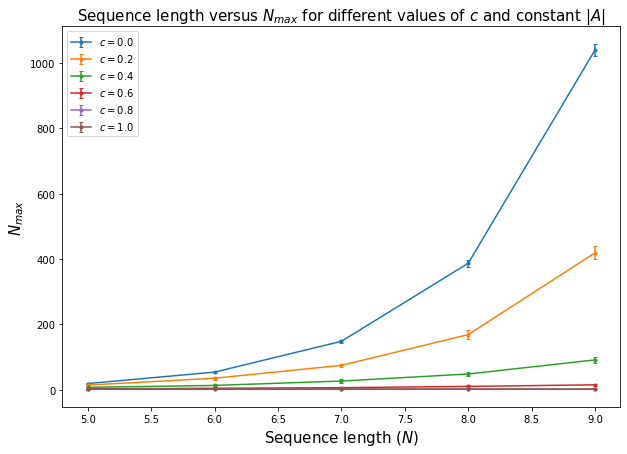

In [31]:
_ = plt.figure(figsize=(10,7))

for i in range(len(mean_results)):
    plt.errorbar(nvals, mean_results[i], yerr=std_results[i], capsize=2,
                 marker='.', label='$c = {}$'.format(round(cvals[i], 2)))
plt.title('Sequence length versus $N_{max}$ for different values of $c$ and constant $|A|$', fontsize=15)
plt.xlabel('Sequence length ($N$)', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.legend()

### Normalising the data for sequence length


In [32]:
normalisation = lambda A, N: (A**N)/(N*(A-1)+1) #this is the function we will use for normalisation 

In [34]:
norm_matrix = np.array([normalisation(3, i) for i in nvals]) #obtain matrix that we will use to normalise 
#where does the above 2 come into play, I wonder...  It is just a scalar, nothing to worry,
#about, will still normalise
norm_matrix

array([  22.09090909,   56.07692308,  145.8       ,  385.94117647,
       1035.94736842])

In [35]:
mean_results

array([[1.8900e+01, 5.3900e+01, 1.4820e+02, 3.8710e+02, 1.0397e+03],
       [1.4200e+01, 3.5200e+01, 7.4600e+01, 1.6870e+02, 4.1900e+02],
       [7.3000e+00, 1.3200e+01, 2.6600e+01, 4.8200e+01, 9.1300e+01],
       [2.5000e+00, 4.5000e+00, 6.3000e+00, 1.0200e+01, 1.5000e+01],
       [1.5000e+00, 1.2000e+00, 1.3000e+00, 1.3000e+00, 1.3000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]])

In [43]:
length_normalised = mean_results/norm_matrix #normalise the result
length_normed_errors = np.multiply(length_normalised, percent_err)

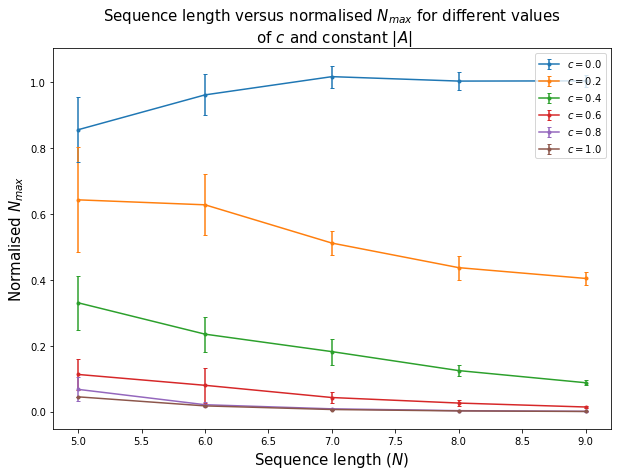

In [44]:


_ = plt.figure(figsize=(10,7))

for i in range(len(length_normalised)):
    plt.errorbar(nvals, length_normalised[i], yerr=length_normed_errors[i],
                 marker='.', capsize=2, label='$c = {}$'.format(round(cvals[i], 2)))
plt.title('Sequence length versus normalised $N_{max}$ for different values \n of $c$ and constant $|A|$', fontsize=15)
plt.xlabel('Sequence length ($N$)', fontsize=15)
plt.ylabel('Normalised $N_{max}$', fontsize=15)
plt.legend()